# DBSCAN. Практическая работа

## Цель практической работы

Научиться строить модели кластеризации с помощью метода DBSCAN.

## Что входит в работу


- Загрузите данные и проведите разведочный анализ.
- Предположите оптимальное количество кластеров.
- Постройте модель кластеризации DBSCAN.
- Определите оптимальное количество и структуру кластеров.
- Интерпретируйте полученные результаты.

## Что оценивается 

1. Выполнены все задания.
2. Сделаны выводы по результатам разведочного анализа данных.
3. Объяснены выбранные гиперпараметры модели кластеризации.
4. Сделаны выводы о количестве и структуре кластеров.
5. Сделаны выводы по результатам кластеризации.

# Задача

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды. 
* AFDP — перепад давления на воздушном фильтре. 
* GTEP — давление на выходе из газовой турбины. 
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины. 
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа. 
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [5]:
df = pd.read_csv("gt_2015.csv")

In [7]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     1.95320  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799   
1     1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2     0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3     1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4     1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
7379  3.62680  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.16740  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.48200  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.88370  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.03920  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

           CO      NOX  
0      7.4491  113.250  
1      6.4684  112.020  
2      3.6335   88.147  
3      3.1972   87.078  
4      2.3833   82.515  
...       ...      ...  
7379  10.9930   89.172  
7380  11.1440   88.849  
7381  11.4140   96.147  
7382   3.3134   64.738  
7383  11.9810  109.240  

[7384 rows x 11 columns]

In [9]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [11]:
df.describe()

AT          AP           AH         AFDP         GTEP  \
count  7384.000000  7384.00000  7384.000000  7384.000000  7384.000000   
mean     17.225259  1014.50911    68.647464     3.598909    26.130149   
std       8.095783     6.89543    13.541116     0.610226     4.473737   
min      -6.234800   989.40000    24.085000     2.368800    17.698000   
25%      11.073250  1009.67500    59.447250     3.117300    23.147000   
50%      17.456500  1014.00000    70.952000     3.538500    25.331000   
75%      23.684750  1018.30000    79.653750     4.194825    30.018250   
max      37.103000  1036.60000    96.666000     5.239500    40.716000   

               TIT          TAT          TEY          CDP           CO  \
count  7384.000000  7384.000000  7384.000000  7384.000000  7384.000000   
mean   1078.974689   546.642484   133.993380    12.097025     3.129986   
std      19.762449     5.489066    16.179208     1.136601     2.234962   
min    1016.000000   516.040000   100.020000     9.870800     0.212800   
25%    1070.500000   544.747500   126.255000    11.465750     1.808175   
50%    1080.300000   549.720000   131.600000    11.933000     2.533400   
75%    1099.900000   550.030000   147.160000    13.148000     3.702550   
max    1100.400000   550.590000   179.500000    15.159000    41.097000   

               NOX  
count  7384.000000  
mean     59.890509  
std      11.132464  
min      25.905000  
25%      52.399000  
50%      56.838500  
75%      65.093250  
max     119.680000

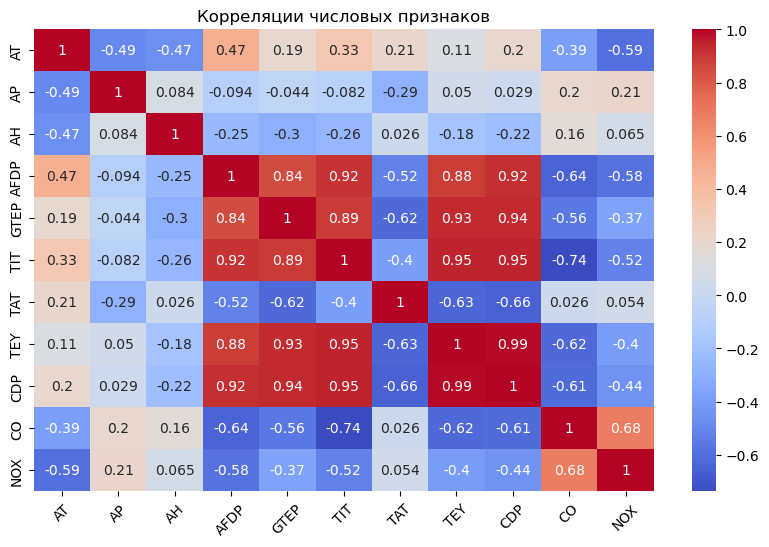

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

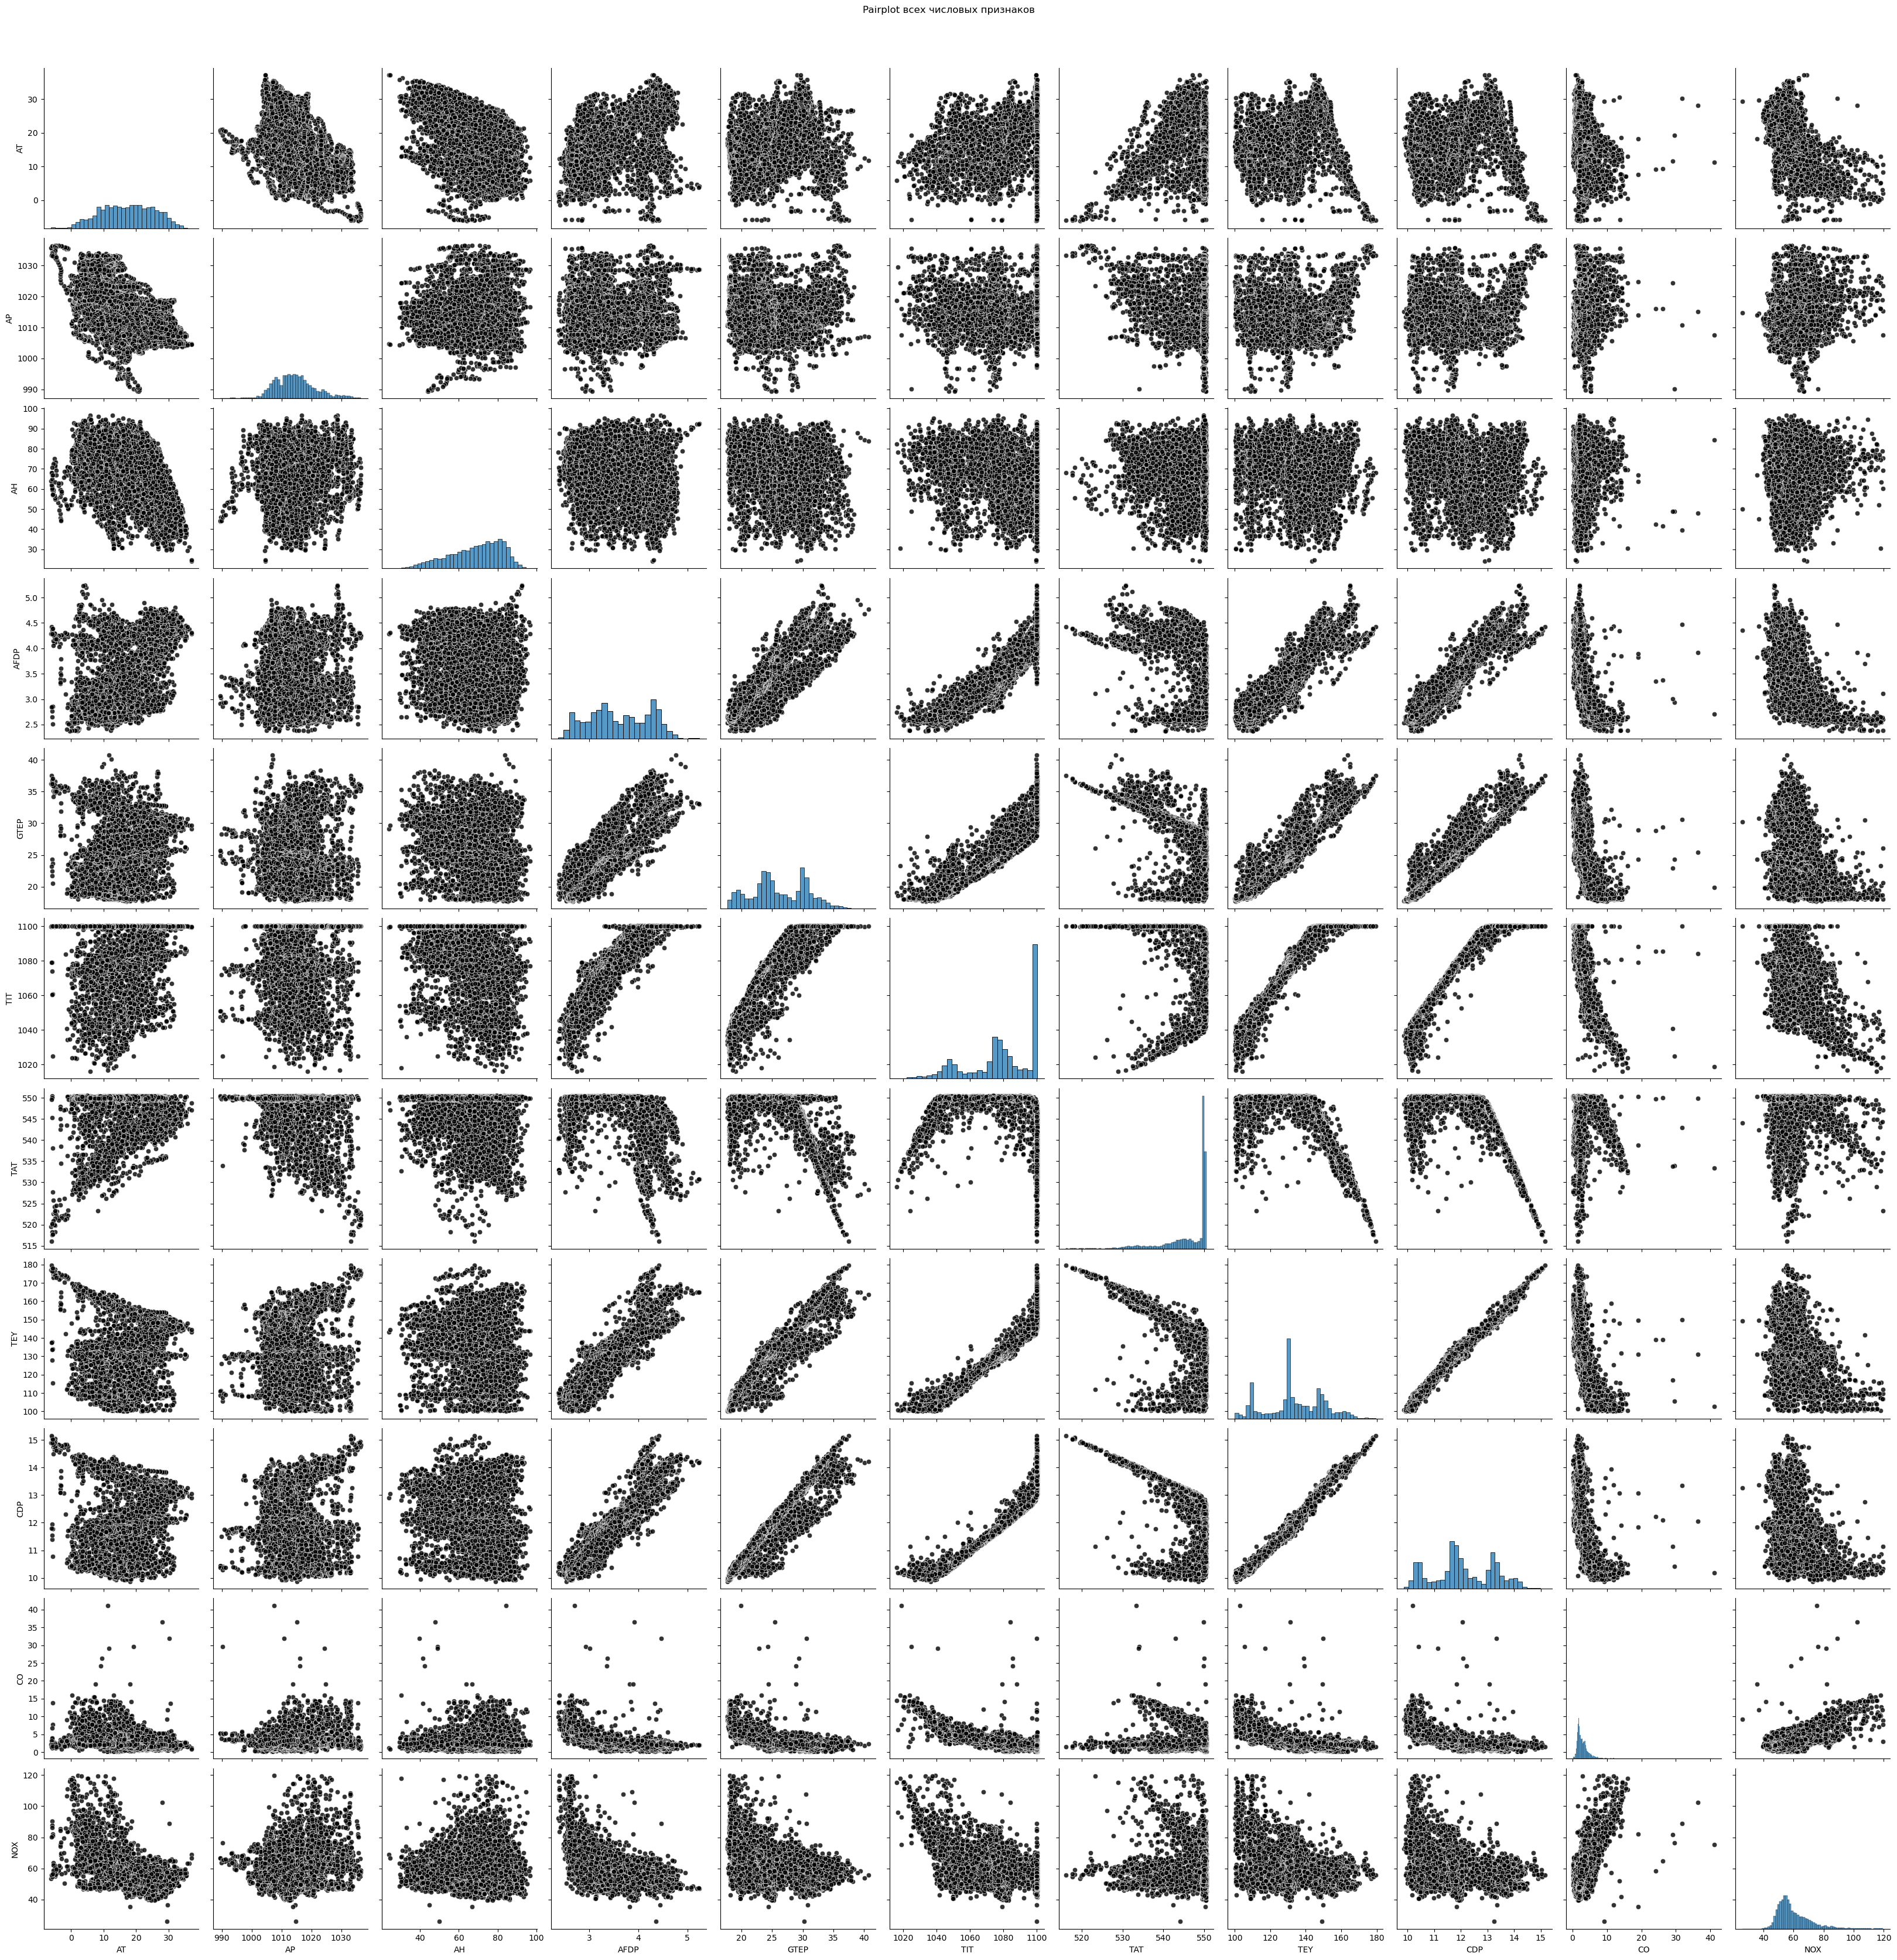

In [14]:
sns.pairplot(df, diag_kind='hist', height=3, plot_kws={'color': 'black', 'alpha': 0.8})
plt.suptitle('Pairplot всех числовых признаков', y=1.02)
plt.show()

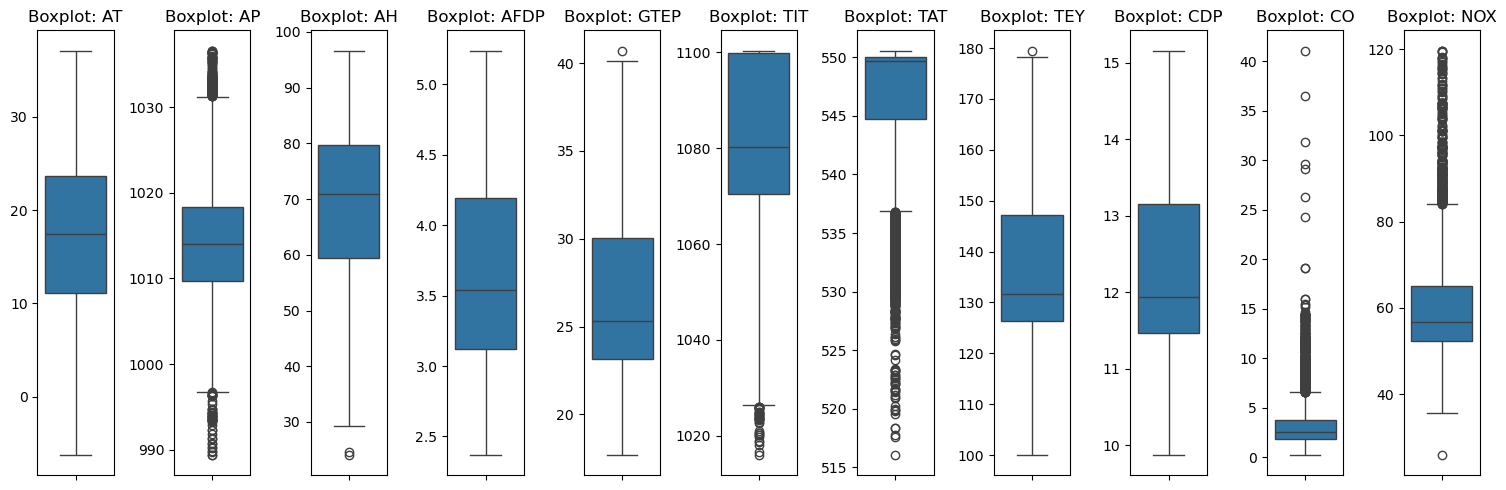

In [15]:
fig, axes = plt.subplots(1, df.shape[1], figsize=(15, 5))

for i, feature in enumerate(df):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot: {feature}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [16]:
numeric_features = df.select_dtypes(include=["int", "float"]).columns

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

### Корреляционный анализ показал, что часть параметров связана между собой, но сильной мультиколлинеарности нет.

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

In [19]:
df

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0    -1.886549  0.810866  1.206595 -1.751125 -1.344414 -1.532034 -0.313824   
1    -1.977232  0.810866  1.394037 -1.975155 -1.686881 -1.693968  0.338426   
2    -2.010579  1.115436  0.715465 -1.343871 -0.864246 -0.514884  0.602605   
3    -2.003371  1.042919  0.612586 -1.281431 -0.619691 -0.191016  0.544304   
4    -1.968993  1.028416  0.597077 -1.247506 -0.591749 -0.140412  0.553413   
...        ...       ...       ...       ...       ...       ...       ...   
7379 -1.679810  2.029146  1.813307 -0.709309 -1.574439 -2.124106 -0.920526   
7380 -1.613030  2.043650  1.875049 -0.666371 -1.590311 -2.093743 -0.794813   
7381 -1.450638  2.029146  1.962418 -0.468889 -1.625854 -2.073501 -0.576181   
7382 -1.401017  2.058153  1.887161  0.629631 -0.573865 -0.104988  0.631756   
7383 -1.381808  2.072656  1.912788  0.452799 -0.806125 -0.560428  0.289234   

           TEY       CDP        CO       NOX  
0    -1.095516 -1.142101  1.932653  4.793468  
1    -1.533762 -1.539805  1.493824  4.682972  
2    -0.501504 -0.739998  0.225305  2.538378  
3    -0.110234 -0.347573  0.030076  2.442346  
4    -0.025552 -0.316777 -0.334116  2.032436  
...        ...       ...       ...       ...  
7379 -1.539944 -1.483493  3.518425  2.630458  
7380 -1.557869 -1.542445  3.585992  2.601441  
7381 -1.618445 -1.438619  3.706807  3.257046  
7382 -0.159684 -0.286861  0.082072  0.435467  
7383 -0.530555 -0.558743  3.960520  4.433235  

[7384 rows x 11 columns]

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

In [473]:
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

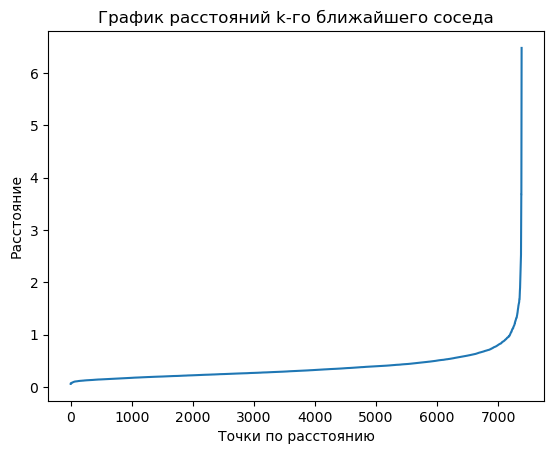

In [474]:
distances = np.sort(distances[:, 1]) 
plt.plot(distances)
plt.title('График расстояний k-го ближайшего соседа')
plt.ylabel('Расстояние')
plt.xlabel('Точки по расстоянию')
plt.show()

In [523]:
dbscan = DBSCAN(eps=0.5, min_samples=15)
clusters_dbs = dbscan.fit_predict(df)

In [524]:
df['cluster'] = clusters_dbs

In [525]:
df

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0    -1.886549  0.810866  1.206595 -1.751125 -1.344414 -1.532034 -0.313824   
1    -1.977232  0.810866  1.394037 -1.975155 -1.686881 -1.693968  0.338426   
2    -2.010579  1.115436  0.715465 -1.343871 -0.864246 -0.514884  0.602605   
3    -2.003371  1.042919  0.612586 -1.281431 -0.619691 -0.191016  0.544304   
4    -1.968993  1.028416  0.597077 -1.247506 -0.591749 -0.140412  0.553413   
...        ...       ...       ...       ...       ...       ...       ...   
7379 -1.679810  2.029146  1.813307 -0.709309 -1.574439 -2.124106 -0.920526   
7380 -1.613030  2.043650  1.875049 -0.666371 -1.590311 -2.093743 -0.794813   
7381 -1.450638  2.029146  1.962418 -0.468889 -1.625854 -2.073501 -0.576181   
7382 -1.401017  2.058153  1.887161  0.629631 -0.573865 -0.104988  0.631756   
7383 -1.381808  2.072656  1.912788  0.452799 -0.806125 -0.560428  0.289234   

           TEY       CDP        CO       NOX  cluster  
0    -1.095516 -1.142101  1.932653  4.793468       -1  
1    -1.533762 -1.539805  1.493824  4.682972       -1  
2    -0.501504 -0.739998  0.225305  2.538378       -1  
3    -0.110234 -0.347573  0.030076  2.442346       -1  
4    -0.025552 -0.316777 -0.334116  2.032436       -1  
...        ...       ...       ...       ...      ...  
7379 -1.539944 -1.483493  3.518425  2.630458       -1  
7380 -1.557869 -1.542445  3.585992  2.601441       -1  
7381 -1.618445 -1.438619  3.706807  3.257046       -1  
7382 -0.159684 -0.286861  0.082072  0.435467       -1  
7383 -0.530555 -0.558743  3.960520  4.433235       -1  

[7384 rows x 12 columns]

In [529]:
sil_dbs = silhouette_score(df, df["cluster"])
sil_dbs

0.20807834647114629

In [530]:
df["cluster"].value_counts()

cluster
-1     5206
 14     227
 18     144
 20     138
 33     132
 15     132
 16      94
 25      83
 8       81
 28      73
 3       61
 47      58
 30      56
 36      51
 37      44
 29      44
 38      39
 0       38
 13      37
 48      35
 34      33
 45      29
 1       27
 46      27
 7       26
 6       24
 27      24
 35      23
 39      23
 24      23
 11      22
 26      21
 2       21
 49      20
 9       20
 19      19
 43      19
 42      18
 44      17
 32      16
 12      16
 21      16
 23      16
 10      15
 40      15
 17      15
 22      15
 5       15
 4       15
 31      13
 41       8
Name: count, dtype: int64

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных. 

### Основные кластеры отличаются по:  мощности турбин, скорости ветра, произведённой энергии, другим эксплуатационным характеристикам.

### Аномальные наблюдения (кластер -1) отличаются от остальных: либо слишком большими/маленькими значениями мощности, либо нестандартным сочетанием параметров